# Prediction using Unsupervised ML

### Problem: From the given Iris dataset, predict the optimum number of clusters and represent it visually.

#### K-Means Clustering Algorithm is been used in this task.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [11]:
Iris = pd.read_csv(r"C:\Users\ACER\anaconda3\Data\Iris.csv")
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
#Dividing into independent and dependent features
x = Iris.iloc[:,[1,4]].values

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


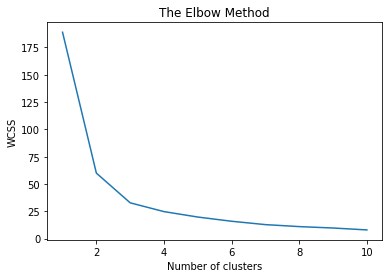

In [15]:
#To find optimal number of clusters
#WCSS = sum of squared distance between each point and the centroid in a cluster
#init argument is the method for initializing the centroid
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init ='k-means++', random_state= 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [16]:
#Training the KMeans model on dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 3 0 1 3 1 3 1 3 1 1 3 1 3 1 3 1 1 3 1 3 3 3 3
 3 3 3 3 3 1 1 1 1 3 1 3 3 3 1 1 1 3 1 1 1 1 1 3 1 1 3 3 0 3 3 0 1 0 3 0 3
 3 0 3 3 3 3 0 0 3 0 3 0 3 0 0 3 3 3 0 0 0 3 3 3 0 3 3 3 0 0 0 3 0 0 0 3 3
 3 3]


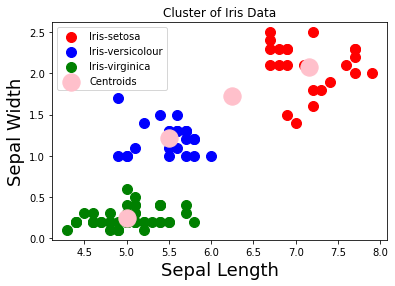

In [17]:
#Giving zero values with s value as 100 & centroid as pink colour
plt.scatter(x[y_kmeans ==0, 0], x[y_kmeans==0, 1], s=100, c='red', label ='Iris-setosa')
plt.scatter(x[y_kmeans ==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label ='Iris-versicolour')
plt.scatter(x[y_kmeans ==2, 0], x[y_kmeans==2, 1], s=100, c='green', label ='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='pink', label ='Centroids')
plt.title('Cluster of Iris Data')
plt.xlabel('Sepal Length', fontsize =18)
plt.ylabel('Sepal Width', fontsize =18)
plt.legend()
plt.show() 
